In [13]:
import surp
import arya
import matplotlib.pyplot as plt
import numpy as np
import sys
import vice

In [14]:
sys.path.append("..")
import singlezone

In [389]:
t1 = 4.1
t_end = 13.2
nu1 = 2
nu2 = 1

tau1=0.1
tau2= 8
A21 = 8

Atot = A21 + 1

Mstar = 6454249300.0
A = Mstar / Atot / 1.41

In [390]:
zonewidth = 2 # kpc
R0 = 8
area = np.pi * ((R0 + zonewidth/2)**2 - (R0 - zonewidth/2)**2)


In [391]:
sfh = surp.simulation.sfh_models.twoexp(t1=t1, t2=t_end, tau1=tau1, tau2=tau2, A21=A21)
tau_star = surp.simulation.properties.twoinfall_sf_law(area=area, t1=t1, nu1=nu1, nu2=nu2)

def tau_star(t):
    if t < t1:  
        return 1/nu1
    else:
        return 1/nu2
sfh.norm = A

Text(0, 0.5, 'infall rate')

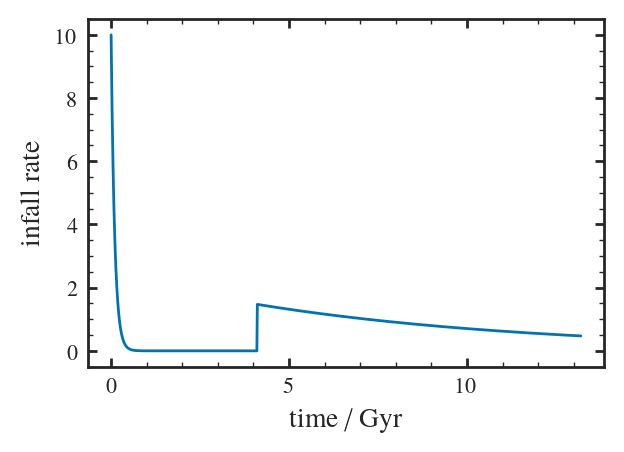

In [392]:
t = np.linspace(0, 13.2, 1000)
plt.plot(t, sfh(t))
plt.xlabel("time / Gyr")
plt.ylabel("infall rate")

Text(0, 0.5, 'tau star')

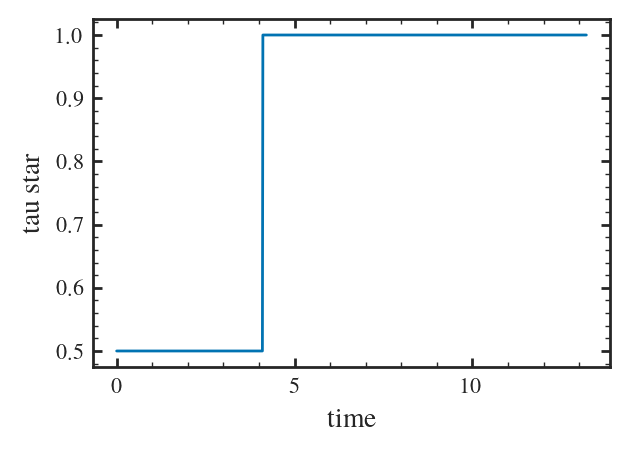

In [393]:
plt.plot(t, [tau_star(x) for x in t])
plt.xlabel("time")
plt.ylabel("tau star")

In [394]:
surp.set_yields();

yields set to Magg et al. 2022 abundances
Yield settings
X        Z_solar    CC                             agb                            SN Ia                          

c        3.39e-03   2.28e-03 + 8.14e-01 (Z - Z0)   1.00 × cristallo11             0                              

n        1.04e-03   5.00e-04                       5.02e-04 M Z/Z0                0                              

o        7.33e-03   7.13e-03                       0                              0                              

mg       6.71e-04   6.52e-04                       0                              0                              

fe       1.37e-03   4.73e-04                       0                              7.70e-04                       





In [406]:
sz = vice.singlezone(func=sfh, mode="ifr", eta=0.5, tau_star=tau_star, dt=0.01, Mg0=0, schmidt=True)

sz

vice.singlezone{
    name -----------> onezonemodel
    func -----------> <surp.simulation.sfh_models.twoexp object at 0x2b45bc501ea0>
    mode -----------> ifr
    verbose --------> False
    elements -------> ('fe', 'sr', 'o')
    IMF ------------> kroupa
    eta ------------> 0.5
    enhancement ----> 1.0
    entrainment ----> <entrainment settings>
    Zin ------------> 0.0
    recycling ------> continuous
    delay ----------> 0.15
    RIa ------------> plaw
    Mg0 ------------> 1e-12
    smoothing ------> 0.0
    tau_ia ---------> 1.5
    tau_star -------> <function tau_star at 0x2b45bc4abc70>
    schmidt --------> True
    schmidt_index --> 0.5
    MgSchmidt ------> 6000000000.0
    dt -------------> 0.01
    m_upper --------> 100.0
    m_lower --------> 0.08
    postMS ---------> 0.1
    Z_solar --------> 0.014
    bins -----------> [-3, -2.95, -2.9, ... , 0.9, 0.95, 1]
}

In [407]:
# vice.yields.ccsne.settings["mg"] = 0.000652 * 0.9
# vice.yields.sneia.settings["fe"] = 0.00077 * 1.1
# vice.yields.ccsne.settings["fe"] = 0.000473 * 0.8

In [408]:
out = sz.run(t, capture=True, overwrite=True)

/users/PAS2232/aeyobd/VICE/vice/core/singlezone/singlezone.py:1797: VisibleRuntimeWarning: Functions of stellar mass and metallicity for asymptotic giant branch star yields may significantly increase the required integration time, especially for fine timestepping.
  return self.__c_version.run(output_times, capture = capture,
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: fe
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: o
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/outputs/output.py:131: UserWarning: agb fe yield not encoded with output. Assuming the current yield setting, which may not reflect the yield setting at the time the simulation was ran.
  self.__c_version = c_output(name)
/users/PAS2232/aeyobd/VICE/vice/core/outputs/output.py:131: 

In [409]:
h = singlezone.extract_history(out)

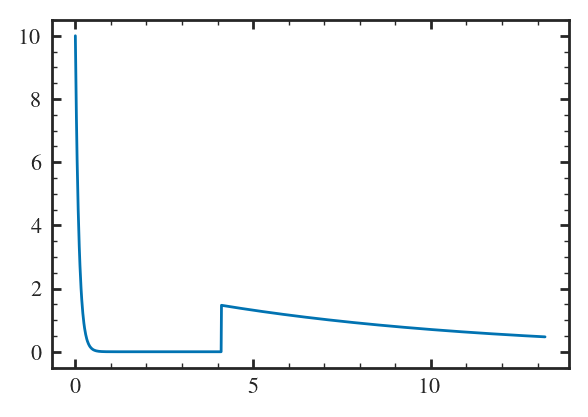

In [410]:
plt.plot(h.time, h.ifr)

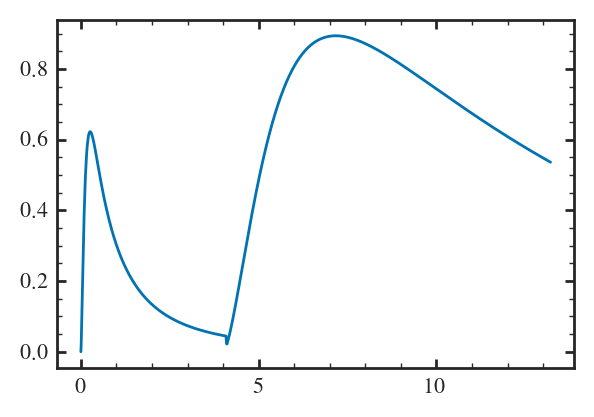

In [411]:
plt.plot(h.time, h.sfr)

(0.0, 0.6)

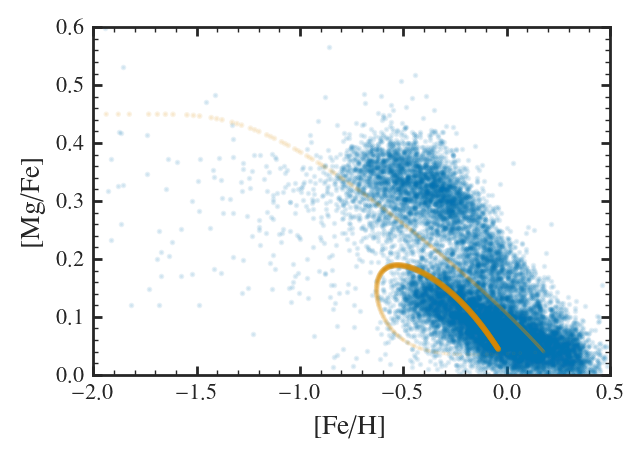

In [412]:
plt.scatter(surp.subgiants.FE_H,  surp.subgiants.MG_FE, s=1, alpha=0.1)
plt.scatter(h.FE_H, -h.FE_O, s=2*h.sfr, alpha=0.1)

plt.xlabel("[Fe/H]")
plt.ylabel("[Mg/Fe]")
plt.xlim(-2, 0.5)
plt.ylim(0, 0.6)